In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("mymoviedb.csv",lineterminator="\n")
print(df.count())

Release_Date         9827
Title                9827
Overview             9827
Popularity           9827
Vote_Count           9827
Vote_Average         9827
Original_Language    9827
Genre                9827
Poster_Url           9827
dtype: int64


In [ ]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
df["Release_Date"]=df["Release_Date"].astype("datetime64[ns]")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [ ]:
df.insert(1,"Release_year",df["Release_Date"].dt.year)

In [ ]:
def avg_cat(df,col,labels):
  edges =[df[col].describe()["min"],
          df[col].describe()["25%"],
          df[col].describe()["50%"],
          df[col].describe()["75%"],
          df[col].describe()["max"]]
  df[col]= pd.cut(df[col],edges,labels=labels)
  return df
labels = ["Not Popular","below_Average","Average","Popular"]
avg_cat(df,"Vote_Average",labels)

,Release_Date,Release_year,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,Popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_Average,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,Average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,Popular,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,Not Popular,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,Not Popular,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Average,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [ ]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
Not Popular,2467
Popular,2450
Average,2412
below_Average,2398


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Release_year,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [ ]:
cols =["Release_Date","Overview","Original_Language","Poster_Url"]
df.drop(cols,axis=1,inplace=True)

In [ ]:
df["Genre"]=df["Genre"].astype("category")

In [ ]:
df.columns

Index(['Release_year', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [ ]:
df.nunique()

,0
Release_year,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,2324


In [ ]:
df["Genre"]=df["Genre"].str.split(", ")
df = df.explode('Genre').reset_index(drop=True)


In [ ]:
df.head()

,Release_year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
df.nunique()

,0
Release_year,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [ ]:
sns.set_style("whitegrid")

<ipython-input-22-94d2f8286fc8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Genre",kind="count",data=df,order=df["Genre"].value_counts().index,palette= "rocket")


<Figure size 1000x500 with 0 Axes>

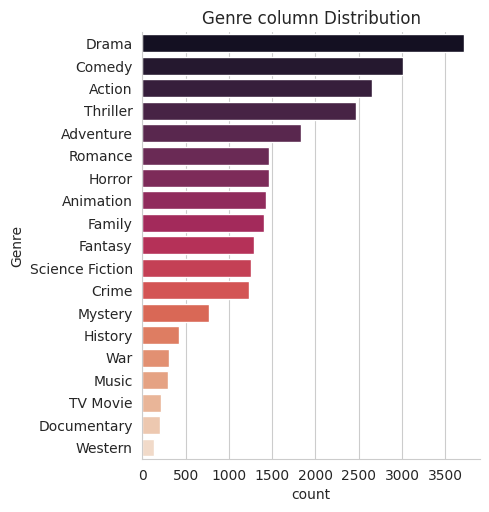

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(y="Genre",kind="count",data=df,order=df["Genre"].value_counts().index,palette= "rocket")
plt.title("Genre column Distribution")
plt.show()

<ipython-input-23-d5e293fbf43b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Vote_Average" ,data = df,kind="count",palette="rocket",order = df["Vote_Average"].value_counts().index)


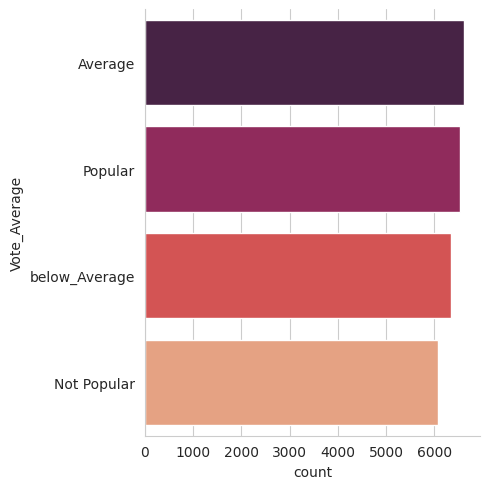

In [ ]:
sns.catplot(y="Vote_Average" ,data = df,kind="count",palette="rocket",order = df["Vote_Average"].value_counts().index)

In [ ]:
df[df["Popularity"]== df["Popularity"].max()]

,Release_year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [ ]:
df[df["Popularity"]== df["Popularity"].min()]

,Release_year,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


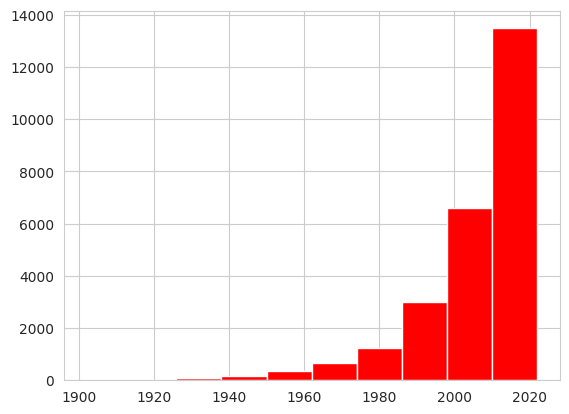

In [ ]:
plt.hist(data=df,x="Release_year",color="red")
plt.show()

**Q1: What is the most frequent genre in the dataset?**

*Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.*

**Q2: What genres has highest votes ?**

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

**Q3: What movie got the highest popularity? what's its genre ?**

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

**Q4: What movie got the lowest popularity? what's its genre ?**

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

**Q5: Which year has the most filmmed movies?**

year 2020 has the highest filmming rate in our dataset.: